### Hierarchical Clustering algorithm using dynamic programming
Hierarchial clustering is an agglomeration clustering that starts by considering each data point as a cluster and goes forward by merging these clusters based on some similairty until it reaches the number of clusers we mention. <br>
To calculate similarty between clusters, various types of distances called linkages are used. <br>
Linkages - <br>
Single is minimum distance between datapoints in cluster <br>
Complete is maximum distance between datapoints in cluster <br>
Average is the average distance between datapoints in cluster <br>
Centroid is distance between centroids of datapoints or clusters. <br>

I refered https://github.com/hhundiwala/hierarchical-clustering for this algorithm implementation. This tutorial shows python code to implement hierarchical clustering using 'average' distance method. Initially every point is considered a cluster. A distance matrix maintains distances between data points. Based on distances, closes two points are merged into cluster and agian distances between clusters are calculated and so on.

For this algorithm I considered same wines dataset. But I have used only the first two columns - Alcohol, Malic.acid data for this.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wines = pd.read_csv("data/wine.csv")
wines.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine = wines.drop('Wine', axis=1)

In [5]:
wine.columns

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [6]:
wine.drop(['Ash','Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth',
           'Color.int', 'Hue', 'OD', 'Proline'], axis=1, inplace=True)

In [7]:
wine.columns

Index(['Alcohol', 'Malic.acid'], dtype='object')

In [8]:
import numpy as np
np_data = np.array(np.rec.fromrecords(wine.values))
data = np.array(wine.values)

In [9]:
data

array([[ 14.23,   1.71],
       [ 13.2 ,   1.78],
       [ 13.16,   2.36],
       [ 14.37,   1.95],
       [ 13.24,   2.59],
       [ 14.2 ,   1.76],
       [ 14.39,   1.87],
       [ 14.06,   2.15],
       [ 14.83,   1.64],
       [ 13.86,   1.35],
       [ 14.1 ,   2.16],
       [ 14.12,   1.48],
       [ 13.75,   1.73],
       [ 14.75,   1.73],
       [ 14.38,   1.87],
       [ 13.63,   1.81],
       [ 14.3 ,   1.92],
       [ 13.83,   1.57],
       [ 14.19,   1.59],
       [ 13.64,   3.1 ],
       [ 14.06,   1.63],
       [ 12.93,   3.8 ],
       [ 13.71,   1.86],
       [ 12.85,   1.6 ],
       [ 13.5 ,   1.81],
       [ 13.05,   2.05],
       [ 13.39,   1.77],
       [ 13.3 ,   1.72],
       [ 13.87,   1.9 ],
       [ 14.02,   1.68],
       [ 13.73,   1.5 ],
       [ 13.58,   1.66],
       [ 13.68,   1.83],
       [ 13.76,   1.53],
       [ 13.51,   1.8 ],
       [ 13.48,   1.81],
       [ 13.28,   1.64],
       [ 13.05,   1.65],
       [ 13.07,   1.5 ],
       [ 14.22,   3.99],


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn import datasets
from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
import sys

In [11]:
initial_distances = pairwise_distances(data,metric='euclidean')
#making all the diagonal elements infinity 
np.fill_diagonal(initial_distances,sys.maxsize)

In [12]:
def find_and_plot_clusters(input,no_of_clusters):
    clusters = {}
    row_index = -1
    col_index = -1
    array = []

    #input = initial_distances   
    for n in range(input.shape[0]):
        array.append(n)
        
    clusters[0] = array.copy()
    #finding minimum value from the distance matrix
    #note that this loop will always return minimum value from bottom triangle of matrix
    for k in range(1, input.shape[0]):
        min_val = sys.maxsize
        
        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j
        
        #Compute Average Linkage
        for i in range(0,input.shape[0]):
            if(i != col_index and i!=row_index):
                temp = (input[col_index][i]+input[row_index][i])/2
                input[col_index][i] = temp
                input[i][col_index] = temp

        #set the rows and columns for the cluster with higher index i.e. the row index to infinity
        #Set input[row_index][for_all_i] = infinity
        #set input[for_all_i][row_index] = infinity
        for i in range (0,input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize
            
        #Manipulating the dictionary to keep track of cluster formation in each step
        #if k=0,then all datapoints are clusters
       
        minimum = min(row_index,col_index)
        maximum = max(row_index,col_index)
        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()
    #return clusters
       
    #plotting the clusters
    color = ['r','g','b','y','c','m','k','w']
    iteration_number = initial_distances.shape[0] - no_of_clusters
    clusters_to_plot = clusters[iteration_number]
    arr = np.unique(clusters_to_plot)
    dt = np.empty(shape = data.shape)
    dt = data
    dt
    indices_to_plot = []
    fig = plt.figure()
    fig.suptitle('Scatter Plot for clusters')
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for x in np.nditer(arr):
        indices_to_plot.append(np.where(clusters_to_plot==x))
    p=0
    
    print(clusters_to_plot)
    for i in range(0,len(indices_to_plot)):
        for j in np.nditer(indices_to_plot[i]):
            ax.scatter(dt[j,0],dt[j,1], c= color[p])
        p = p + 1
        
    plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 19, 0, 19, 0, 19, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 59, 59, 59, 0, 59, 59, 59, 0, 59, 0, 59, 0, 0, 0, 0, 59, 59, 0, 21, 59, 21, 59, 0, 59, 21, 59, 59, 59, 59, 59, 59, 59, 59, 0, 21, 59, 0, 59, 59, 59, 21, 59, 59, 21, 59, 0, 21, 59, 0, 59, 59, 21, 21, 21, 113, 59, 113, 59, 0, 21, 21, 21, 59, 21, 19, 21, 59, 0, 59, 0, 21, 0, 21, 21, 21, 59, 21, 21, 19, 19, 21, 21, 0, 19, 19, 21, 19, 19, 19, 19, 21, 19, 21, 0, 19, 59, 19, 19, 21, 0, 0, 21, 19, 21, 21, 0, 19, 19, 21, 0, 19, 21, 21, 0, 19, 19, 19, 0, 19]


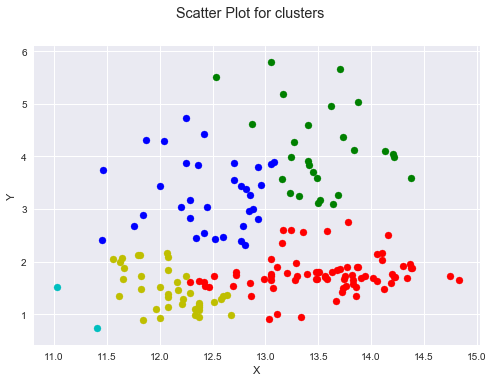

In [13]:
clusters = find_and_plot_clusters(initial_distances,4)

#### References:
http://nbviewer.jupyter.org/github/OxanaSachenkova/hclust-python/blob/master/hclust.ipynb <br>
https://github.com/hhundiwala/hierarchical-clustering/blob/master/Hierarchical%20Clustering%20Explanation.ipynb